In [15]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import dynalearn as dl
import os

In [21]:
path = "/media/charles/charles-usb/dynalearn-data/training/PlanckSIS-BAGraph-10000/"

experiment = dl.Experiment.from_file(os.path.join(path, "config.pickle"))
experiment.load_metrics()

## LTP on star graphs

/home/charles/Documents/ulaval/doctorat/projects/dynalearn/dynalearn/metrics/aggregator.py:61: RuntimeWarning: Mean of empty slice
  y[i] = op_val(values[index, out_state])
/home/charles/Documents/ulaval/doctorat/projects/dynalearn/dynalearn/metrics/aggregator.py:21: RuntimeWarning: Degrees of freedom <= 0 for slice.
  op_err = lambda xx: np.sqrt(np.nanvar(xx))


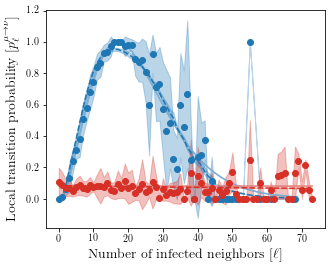

In [22]:
transitions = [(0, 1), (1, 0)]
transition_labels = [("S", "I"), ("I", "S")]
fontsize=14

color_true = [dl.utilities.color_pale["blue"], dl.utilities.color_pale["red"]]
color_gnn = [dl.utilities.color_dark["blue"], dl.utilities.color_dark["red"]]
handles = []

fig, ax = plt.subplots(1,1, figsize=(5, 4))
for i, t in enumerate(transitions):
    x, y, err = experiment.metrics["TrueLTPMetrics"].aggregate(experiment.metrics["TrueLTPMetrics"].data["ltp/train"],
                                                                   in_state=t[0], out_state=t[1])
    ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='-', color=color_true[i], label="True")
    
    x, y, err = experiment.metrics["GNNLTPMetrics"].aggregate(experiment.metrics["GNNLTPMetrics"].data["ltp/train"],
                                                                   in_state=t[0], out_state=t[1])
    ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='--', color=color_gnn[i], label="GNN")
    
    x, y, err = experiment.metrics["MLELTPMetrics"].aggregate(experiment.metrics["MLELTPMetrics"].data["ltp/train"],
                                                                   in_state=t[0], out_state=t[1])
    ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='None', marker='o', color=color_gnn[i], label="MLE")
    
#     x, y, err = experiment.metrics["UniformStarLTPMetrics"].aggregate(experiment.metrics["UniformStarLTPMetrics"].data["ltp"], 
#                                                                       in_state=t[0], out_state=t[1])
#     ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
#     ax.plot(x, y, linestyle='--', color=color_gnn[i], label="GNN")
    
    
plt.xlabel(r"Number of infected neighbors $[\ell]$", fontsize=fontsize)
plt.ylabel(r"Local transition probability $[p^{\mu\to\nu}_\ell]$", fontsize=fontsize)
plt.show()

## LTP on Star graph


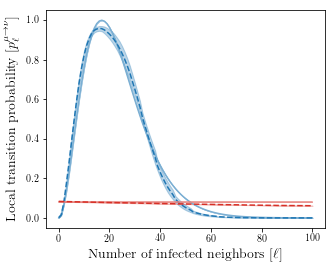

In [23]:
transitions = [(0, 1), (1, 0)]
transition_labels = [("S", "I"), ("I", "S")]
fontsize=14

color_true = [dl.utilities.color_pale["blue"], dl.utilities.color_pale["red"]]
color_gnn = [dl.utilities.color_dark["blue"], dl.utilities.color_dark["red"]]
handles = []

fig, ax = plt.subplots(1,1, figsize=(5, 4))
for i, t in enumerate(transitions):
    x, y, err = experiment.metrics["TrueStarLTPMetrics"].aggregate(experiment.metrics["TrueStarLTPMetrics"].data["ltp"],
                                                                   in_state=t[0], out_state=t[1])
    ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='-', color=color_true[i], label="True")
    
    x, y, err = experiment.metrics["GNNStarLTPMetrics"].aggregate(experiment.metrics["GNNStarLTPMetrics"].data["ltp"],
                                                                   in_state=t[0], out_state=t[1])
    ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='--', color=color_gnn[i], label="GNN")
    
#     x, y, err = experiment.metrics["UniformStarLTPMetrics"].aggregate(experiment.metrics["UniformStarLTPMetrics"].data["ltp"], 
#                                                                       in_state=t[0], out_state=t[1])
#     ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
#     ax.plot(x, y, linestyle='--', color=color_gnn[i], label="GNN")
    
    
plt.xlabel(r"Number of infected neighbors $[\ell]$", fontsize=fontsize)
plt.ylabel(r"Local transition probability $[p^{\mu\to\nu}_\ell]$", fontsize=fontsize)
plt.show()

## JSD

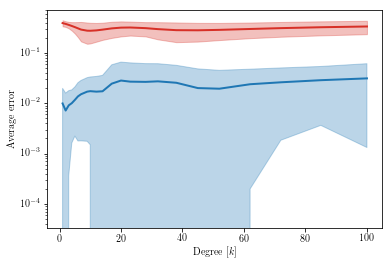

In [24]:
from scipy.spatial.distance import jensenshannon

jsd = experiment.metrics["TrueStarLTPMetrics"].compare("ltp", experiment.metrics["GNNStarLTPMetrics"], func=jensenshannon)
x, y, err = experiment.metrics["GNNStarLTPMetrics"].aggregate(jsd, for_degree=True)
plt.fill_between(x, y - err, y + err, color=dl.utilities.color_dark["blue"], alpha=0.3)
plt.plot(x, y, linestyle='-', color=dl.utilities.color_dark["blue"], linewidth=2)

jsd = experiment.metrics["TrueStarLTPMetrics"].compare("ltp", experiment.metrics["UniformStarLTPMetrics"], func=jensenshannon)
x, y, err = experiment.metrics["GNNStarLTPMetrics"].aggregate(jsd, for_degree=True)
plt.fill_between(x, y - err, y + err, color=dl.utilities.color_dark["red"], alpha=0.3)
plt.plot(x, y, linestyle='-', color=dl.utilities.color_dark["red"], linewidth=2)

plt.xlabel(r"Degree $[k]$")
plt.ylabel(r"Average error")

plt.xscale('linear')
plt.yscale('log')

plt.show()

## Phase transition


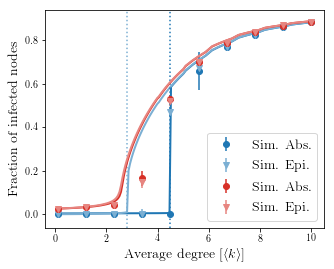

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))


mf_avgk = experiment.metrics["PoissonEpidemicsMFMetrics"].data["parameters"]

mf_low_s = experiment.metrics["PoissonEpidemicsMFMetrics"].data["true_low_fp"]
mf_high_s = experiment.metrics["PoissonEpidemicsMFMetrics"].data["true_high_fp"]
thresholds = experiment.metrics["PoissonEpidemicsMFMetrics"].data["true_thresholds"]
ax.plot(mf_avgk, 1 - mf_low_s[:, 0], linestyle='-', 
        color=dl.utilities.color_dark["blue"], marker='None', linewidth=2)
ax.plot(mf_avgk, 1 - mf_high_s[:, 0], linestyle='-', 
        color=dl.utilities.color_pale["blue"], marker='None', linewidth=2)
ax.axvline(thresholds[0], color=dl.utilities.color_dark["blue"], linestyle='dotted')
ax.axvline(thresholds[1], color=dl.utilities.color_pale["blue"], linestyle='dotted')
ss_avgk = experiment.metrics["PoissonEpidemicsSSMetrics"].data["parameters"]
avg_low_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["true_low_avg"]
std_low_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["true_low_std"]
avg_high_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["true_high_avg"]
std_high_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["true_high_std"]
ax.errorbar(ss_avgk, 1 - avg_low_s[:,0], yerr=std_low_s[:,0], 
            color=dl.utilities.color_dark["blue"], 
            marker='o', 
            linestyle='None',
           label="Sim. Abs.")
ax.errorbar(ss_avgk, 1 - avg_high_s[:,0], yerr=std_high_s[:,0], 
            color=dl.utilities.color_pale["blue"], 
            marker='v', 
            linestyle='None',
           label="Sim. Epi.")

mf_avgk = experiment.metrics["PoissonEpidemicsMFMetrics"].data["parameters"]

mf_low_s = experiment.metrics["PoissonEpidemicsMFMetrics"].data["gnn_low_fp"]
mf_high_s = experiment.metrics["PoissonEpidemicsMFMetrics"].data["gnn_high_fp"]
thresholds = experiment.metrics["PoissonEpidemicsMFMetrics"].data["gnn_thresholds"]
ax.plot(mf_avgk, 1 - mf_low_s[:, 0], linestyle='-', 
        color=dl.utilities.color_dark["red"], marker='None', linewidth=2)
ax.plot(mf_avgk, 1 - mf_high_s[:, 0], linestyle='-', 
        color=dl.utilities.color_pale["red"], marker='None', linewidth=2)
ss_avgk = experiment.metrics["PoissonEpidemicsSSMetrics"].data["parameters"]
avg_low_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["gnn_low_avg"]
std_low_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["gnn_low_std"]
avg_high_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["gnn_high_avg"]
std_high_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["gnn_high_std"]
ax.errorbar(ss_avgk, 1 - avg_low_s[:,0], yerr=std_low_s[:,0], 
            color=dl.utilities.color_dark["red"], 
            marker='o', 
            linestyle='None',
           label="Sim. Abs.")
ax.errorbar(ss_avgk, 1 - avg_high_s[:,0], yerr=std_high_s[:,0], 
            color=dl.utilities.color_pale["red"], 
            marker='v', 
            linestyle='None',
           label="Sim. Epi.")

ax.set_xlabel(r"Average degree $[\langle k \rangle]$", fontsize=fontsize)
ax.set_ylabel(r"Fraction of infected nodes", fontsize=fontsize)
ax.legend(fontsize=fontsize)

plt.show()


In [32]:
print(experiment.metrics["PoissonEpidemicsMFMetrics"].data["true_thresholds"])
print(experiment.metrics["PoissonEpidemicsMFMetrics"].data["gnn_thresholds"])

[4.50194702 2.81488647]
[]


In [ ]:
dl.metrics